<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Garbage-Classifier-ml-code/blob/main/Copy_of_Data_606_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Constructing the DataFrame**

In [ ]:
import pandas as pd
import os
import zipfile

In [ ]:


# 1. Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/Capstone/Project_A.zip', 'r') as zip_ref:
    zip_ref.extractall('pp1')



In [ ]:
# 2. Reading the Directory Structure
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    i = 0
    for file in files:
        i+=1
        if i >500:
          break
        # Assuming images are .jpg (modify this if there are other formats)
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# 3. Constructing the DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print(df.head())


                                          image_path      label
0  pp1/garbage_classification/cardboard/cardboard...  cardboard
1  pp1/garbage_classification/cardboard/cardboard...  cardboard
2  pp1/garbage_classification/cardboard/cardboard...  cardboard
3  pp1/garbage_classification/cardboard/cardboard...  cardboard
4  pp1/garbage_classification/cardboard/cardboard...  cardboard


In [ ]:
print(df.head())

                                          image_path      label
0  pp1/garbage_classification/cardboard/cardboard...  cardboard
1  pp1/garbage_classification/cardboard/cardboard...  cardboard
2  pp1/garbage_classification/cardboard/cardboard...  cardboard
3  pp1/garbage_classification/cardboard/cardboard...  cardboard
4  pp1/garbage_classification/cardboard/cardboard...  cardboard


In [ ]:
df

image_path      label
0     pp1/garbage_classification/cardboard/cardboard...  cardboard
1     pp1/garbage_classification/cardboard/cardboard...  cardboard
2     pp1/garbage_classification/cardboard/cardboard...  cardboard
3     pp1/garbage_classification/cardboard/cardboard...  cardboard
4     pp1/garbage_classification/cardboard/cardboard...  cardboard
...                                                 ...        ...
5995      pp1/garbage_classification/metal/metal717.jpg      metal
5996      pp1/garbage_classification/metal/metal105.jpg      metal
5997      pp1/garbage_classification/metal/metal347.jpg      metal
5998      pp1/garbage_classification/metal/metal696.jpg      metal
5999      pp1/garbage_classification/metal/metal437.jpg      metal

[6000 rows x 2 columns]

**Count of each type of garbage**

In [ ]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['label'].value_counts().reset_index()
df_counts.columns = ['Garbage Type', 'Counts']

# Create a bar chart using Plotly Express
fig = px.bar(df_counts,
              x='Garbage Type',
              y='Counts',
              title='No. of Counts for Each Type of Garbage',
              labels={'Garbage Type': 'Type of Garbage', 'Counts': 'Counts'},
              color='Garbage Type',
              category_orders={"Garbage Type": df_counts['Garbage Type'].tolist()},
              text='Counts',  # Add count labels on top of the bars
              color_discrete_sequence=px.colors.qualitative.Dark2)  # Set color scheme

 # Customize the layout
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_xaxes(title_text=None)  # Remove x-axis label
fig.update_yaxes(title_text=None)  # Remove y-axis label

 # Show the plot
fig.show('')

In [ ]:
df

image_path      label
0     pp1/garbage_classification/cardboard/cardboard...  cardboard
1     pp1/garbage_classification/cardboard/cardboard...  cardboard
2     pp1/garbage_classification/cardboard/cardboard...  cardboard
3     pp1/garbage_classification/cardboard/cardboard...  cardboard
4     pp1/garbage_classification/cardboard/cardboard...  cardboard
...                                                 ...        ...
5995      pp1/garbage_classification/metal/metal717.jpg      metal
5996      pp1/garbage_classification/metal/metal105.jpg      metal
5997      pp1/garbage_classification/metal/metal347.jpg      metal
5998      pp1/garbage_classification/metal/metal696.jpg      metal
5999      pp1/garbage_classification/metal/metal437.jpg      metal

[6000 rows x 2 columns]

**Collecting Some Random Image Data**

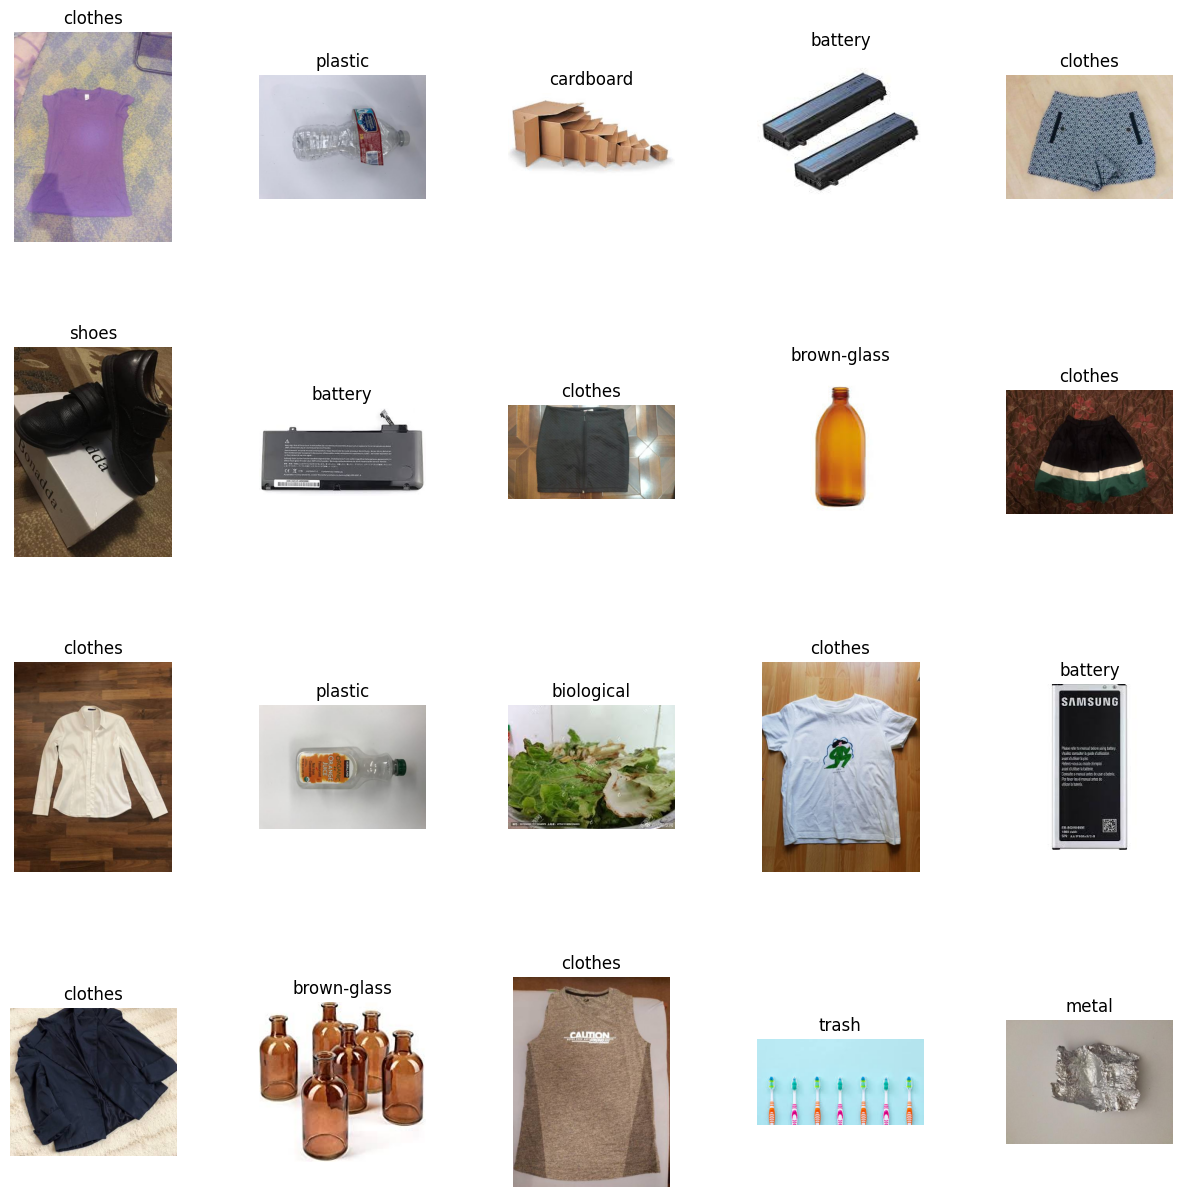

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


# Reading the Directory Structure with filtering
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    for file in files:
        # Ignore macOS metadata files and ensure the file is a .jpg
        if not file.startswith("._") and file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Reconstructing the DataFrame with filtered lists
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Sampling and plotting the images (as before)
sample_df = df.sample(n=20)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(20):
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['label']

    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=12)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Constructing a DataFrame with Image Data**

In [ ]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                image_data.append({
                    'image_id': os.path.splitext(file)[0], # Assuming image_id is the file name without extension
                    'image': img,
                    'image_size': f"{width}x{height}",
                    'category': os.path.basename(root)
                })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)
df.head()


image_id                                              image image_size  \
0  cardboard285  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
1  cardboard757  <PIL.JpegImagePlugin.JpegImageFile image mode=...    241x160   
2    cardboard3  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
3  cardboard677  <PIL.JpegImagePlugin.JpegImageFile image mode=...    225x225   
4   cardboard97  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   

    category  
0  cardboard  
1  cardboard  
2  cardboard  
3  cardboard  
4  cardboard

**Resizing images**

In [ ]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('pp1/garbage_classification'):
    i= 0
    for file in files:
        i+=1
        if i>500:
          break
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            img = Image.open(file_path)  # Open the image without the 'with' statement
            width, height = img.size
            image_data.append({
                'image_id': os.path.splitext(file)[0],  # Assuming image_id is the file name without extension
                'image': img,
                'image_path': file_path,  # Storing the file path for potential future use
                'image_size': f"{width}x{height}",
                'category': os.path.basename(root)
            })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)

# 3. Resizing the images
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

df['resized_image'] = df['image'].apply(lambda img: resize_image(img, (128, 128)))

# Display the updated DataFrame
df.head()


image_id                                              image  \
0  cardboard285  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  cardboard757  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2    cardboard3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  cardboard677  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4   cardboard97  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                          image_path image_size   category  \
0  pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
1  pp1/garbage_classification/cardboard/cardboard...    241x160  cardboard   
2  pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
3  pp1/garbage_classification/cardboard/cardboard...    225x225  cardboard   
4  pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   

                                       resized_image  
0  <PIL.Image.Image image mode=RGB size=128x128 a...  
1  <PIL.Image.Image image mode=RGB size=128x128 a...  
2  <PIL.Image.Image image mode=RGB size=128x128 a...  
3  <PIL.Image.Image image mode=RGB size=128x128 a...  
4  <PIL.Image.Image image mode=RGB size=128x128 a...

**Sample Images from Each Category**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

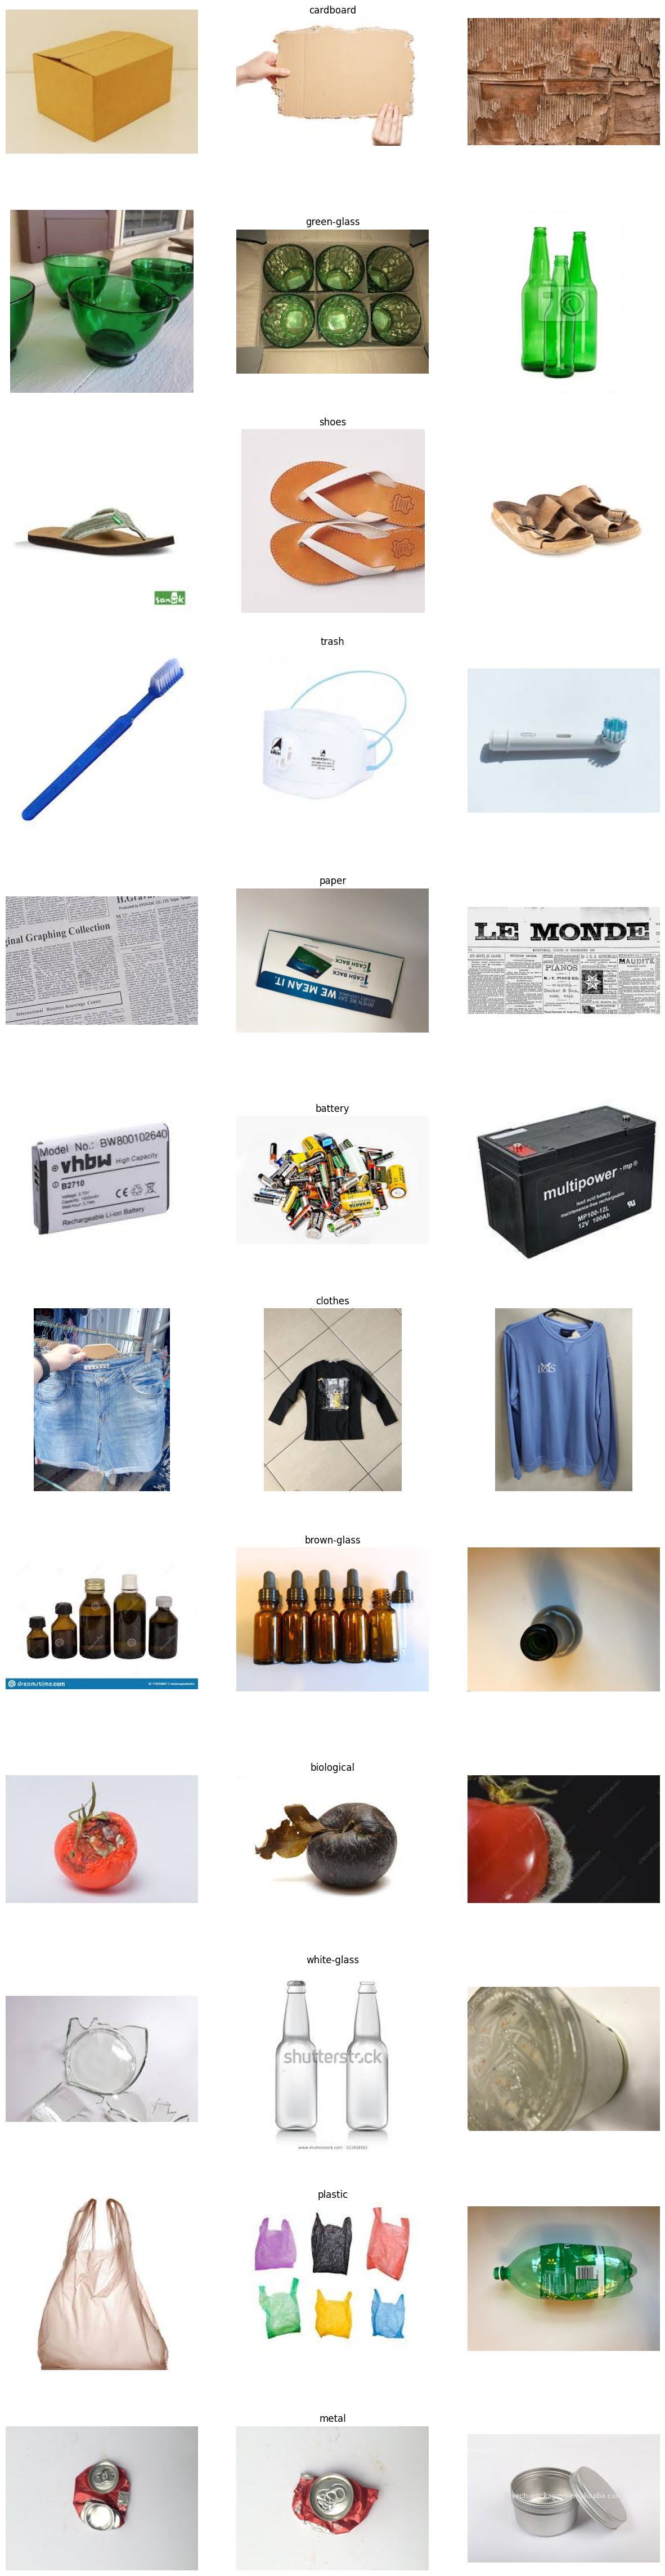

In [ ]:
#Sample Images from Each Category:
categories = df['category'].unique()
fig, axes = plt.subplots(len(categories), 3, figsize=(15, 5 * len(categories)))

for i, category in enumerate(categories):
    sample_images = df[df['category'] == category]['image'].sample(3)
    for j, img in enumerate(sample_images):
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(category)

plt.show()

# **Exploratory Data Analysis (EDA)**

**Step 1: Import Libraries and Load Data**

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = df
data

image_id                                              image  \
0     cardboard285  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1     cardboard757  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2       cardboard3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3     cardboard677  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4      cardboard97  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
...            ...                                                ...   
5995      metal717  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5996      metal105  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5997      metal347  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5998      metal696  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5999      metal437  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                             image_path image_size   category  \
0     pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
1     pp1/garbage_classification/cardboard/cardboard...    241x160  cardboard   
2     pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
3     pp1/garbage_classification/cardboard/cardboard...    225x225  cardboard   
4     pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
...                                                 ...        ...        ...   
5995      pp1/garbage_classification/metal/metal717.jpg    272x185      metal   
5996      pp1/garbage_classification/metal/metal105.jpg    512x384      metal   
5997      pp1/garbage_classification/metal/metal347.jpg    512x384      metal   
5998      pp1/garbage_classification/metal/metal696.jpg    259x194      metal   
5999      pp1/garbage_classification/metal/metal437.jpg    512x384      metal   

                                          resized_image  
0     <PIL.Image.Image image mode=RGB size=128x128 a...  
1     <PIL.Image.Image image mode=RGB size=128x128 a...  
2     <PIL.Image.Image image mode=RGB size=128x128 a...  
3     <PIL.Image.Image image mode=RGB size=128x128 a...  
4     <PIL.Image.Image image mode=RGB size=128x128 a...  
...                                                 ...  
5995  <PIL.Image.Image image mode=RGB size=128x128 a...  
5996  <PIL.Image.Image image mode=RGB size=128x128 a...  
5997  <PIL.Image.Image image mode=RGB size=128x128 a...  
5998  <PIL.Image.Image image mode=RGB size=128x128 a...  
5999  <PIL.Image.Image image mode=RGB size=128x128 a...  

[6000 rows x 6 columns]

**Step 2: Data Cleaning**

First, check for missing values and duplicate rows.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Remove duplicate rows
data = data.drop_duplicates(subset=['image_id'])

image_id         0
image            0
image_path       0
image_size       0
category         0
resized_image    0
dtype: int64


**Step 3: Summary Statistics**

Calculate summary statistics for key variables, primarily focusing on your target variable and selected features.

In [ ]:
# Summary statistics for the target variable
target_summary = data['category'].describe()

# Summary statistics for selected features
features_summary = data['image_size'].describe()

print('Target Summary\n',target_summary)
print('\nFeatures Summary\n',features_summary)

Target Summary
 count          6000
unique           12
top       cardboard
freq            500
Name: category, dtype: object

Features Summary
 count        6000
unique        497
top       512x384
freq         1376
Name: image_size, dtype: object


In [ ]:
import pandas as pd

# Summary statistics for the 'category' column
category_summary = df['category'].value_counts()
category_percentage = df['category'].value_counts(normalize=True) * 100

# Summary statistics for the 'image_size' column
image_size_summary = df['image_size'].value_counts()

# Display the results
print("Summary Statistics for 'category' Variable:")
print(category_summary)
print("\nPercentage Distribution of 'category' Variable:")
print(category_percentage)
print("\nSummary Statistics for 'image_size' Variable:")
print(image_size_summary)


Summary Statistics for 'category' Variable:
cardboard      500
green-glass    500
shoes          500
trash          500
paper          500
battery        500
clothes        500
brown-glass    500
biological     500
white-glass    500
plastic        500
metal          500
Name: category, dtype: int64

Percentage Distribution of 'category' Variable:
cardboard      8.333333
green-glass    8.333333
shoes          8.333333
trash          8.333333
paper          8.333333
battery        8.333333
clothes        8.333333
brown-glass    8.333333
biological     8.333333
white-glass    8.333333
plastic        8.333333
metal          8.333333
Name: category, dtype: float64

Summary Statistics for 'image_size' Variable:
512x384    1376
225x225    1152
275x183     353
259x194     312
400x533     265
           ... 
357x141       1
168x140       1
204x248       1
456x110       1
180x157       1
Name: image_size, Length: 497, dtype: int64


**Step 4: Data Visualization**

Use Plotly Express to create visualizations. For instance, you can create a histogram to visualize the distribution of the target variable and a scatter plot to explore the relationship between image size and the target variable (category).

In [ ]:
# Scatter plot of Image Size vs. Target variable
scatter_plot = px.scatter(data, x='image_size', y='category', title='Image Size vs. Garbage Category')

scatter_plot

In [ ]:
# Box plot of Image Size Distribution by Garbage Category
box_plot = px.box(data, x='category', y='image_size', title='Image Size Distribution by Garbage Category')
box_plot

In [ ]:
# Pie chart of Distribution of Garbage Category
pie_chart = px.pie(data, names='category', title='Distribution of Garbage Categories')
pie_chart

In [ ]:
# Violin Plot Of Image Size by Garbage Category
violin_plot = px.violin(data, x='category', y='image_size', title='Violin Plot of Image Size by Garbage Category')
violin_plot

Traning the model

In [ ]:
import numpy as np

In [ ]:
data

image_id                                              image  \
0     cardboard285  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1     cardboard757  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2       cardboard3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3     cardboard677  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4      cardboard97  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
...            ...                                                ...   
5995      metal717  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5996      metal105  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5997      metal347  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5998      metal696  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
5999      metal437  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                             image_path image_size   category  \
0     pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
1     pp1/garbage_classification/cardboard/cardboard...    241x160  cardboard   
2     pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
3     pp1/garbage_classification/cardboard/cardboard...    225x225  cardboard   
4     pp1/garbage_classification/cardboard/cardboard...    512x384  cardboard   
...                                                 ...        ...        ...   
5995      pp1/garbage_classification/metal/metal717.jpg    272x185      metal   
5996      pp1/garbage_classification/metal/metal105.jpg    512x384      metal   
5997      pp1/garbage_classification/metal/metal347.jpg    512x384      metal   
5998      pp1/garbage_classification/metal/metal696.jpg    259x194      metal   
5999      pp1/garbage_classification/metal/metal437.jpg    512x384      metal   

                                          resized_image  
0     <PIL.Image.Image image mode=RGB size=128x128 a...  
1     <PIL.Image.Image image mode=RGB size=128x128 a...  
2     <PIL.Image.Image image mode=RGB size=128x128 a...  
3     <PIL.Image.Image image mode=RGB size=128x128 a...  
4     <PIL.Image.Image image mode=RGB size=128x128 a...  
...                                                 ...  
5995  <PIL.Image.Image image mode=RGB size=128x128 a...  
5996  <PIL.Image.Image image mode=RGB size=128x128 a...  
5997  <PIL.Image.Image image mode=RGB size=128x128 a...  
5998  <PIL.Image.Image image mode=RGB size=128x128 a...  
5999  <PIL.Image.Image image mode=RGB size=128x128 a...  

[6000 rows x 6 columns]

In [ ]:
data_required = data.iloc[:,-2:]

In [ ]:
data_required

category                                      resized_image
0     cardboard  <PIL.Image.Image image mode=RGB size=128x128 a...
1     cardboard  <PIL.Image.Image image mode=RGB size=128x128 a...
2     cardboard  <PIL.Image.Image image mode=RGB size=128x128 a...
3     cardboard  <PIL.Image.Image image mode=RGB size=128x128 a...
4     cardboard  <PIL.Image.Image image mode=RGB size=128x128 a...
...         ...                                                ...
5995      metal  <PIL.Image.Image image mode=RGB size=128x128 a...
5996      metal  <PIL.Image.Image image mode=RGB size=128x128 a...
5997      metal  <PIL.Image.Image image mode=RGB size=128x128 a...
5998      metal  <PIL.Image.Image image mode=RGB size=128x128 a...
5999      metal  <PIL.Image.Image image mode=RGB size=128x128 a...

[6000 rows x 2 columns]

In [ ]:
image_data = []
Y = []

for image in range(len(df['resized_image'])):
    # Convert the PIL image to a numpy array and check its shape
    if np.array(df['resized_image'][image]).shape == (128, 128, 3):
        image_data.append((np.array(df['resized_image'][image])).astype(np.float32))
        Y.append(df['category'][image])

# Convert the list of image data to a numpy array
X = np.array(image_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y)

In [ ]:
y_train_encoded = pd.get_dummies(y_train_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, test_size=0.2, random_state=42)

In [ ]:
y_train

0   1   2   3   4   5   6   7   8   9   10  11
2550   1   0   0   0   0   0   0   0   0   0   0   0
925    0   0   0   0   0   1   0   0   0   0   0   0
2997   0   0   0   0   1   0   0   0   0   0   0   0
3288   0   0   0   0   1   0   0   0   0   0   0   0
5645   0   0   0   0   0   0   1   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
3772   0   0   1   0   0   0   0   0   0   0   0   0
5191   0   0   0   0   0   0   0   0   1   0   0   0
5226   0   0   0   0   0   0   0   0   1   0   0   0
5390   0   0   0   0   0   0   0   0   1   0   0   0
860    0   0   0   0   0   1   0   0   0   0   0   0

[4784 rows x 12 columns]

In [ ]:
y_train = y_train.to_numpy(dtype=np.float32)

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator.
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)


In [ ]:
import tensorflow as tf

# Load the pre-trained ResNet50 model.
resnet50 = tf.keras.applications.ResNet50(weights='imagenet')

# Freeze the layers of the pre-trained model.
for layer in resnet50.layers[:-10]:
  layer.trainable = False

# Add a new fully connected layer to the model.
model = tf.keras.Sequential([
  resnet50,
  tf.keras.layers.Dense(12, activation='softmax')
])

# Compile the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model.
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25)



102967424/102967424 [==============================] - 6s 0us/step
Epoch 1/25
150/150 [==============================] - 41s 178ms/step - loss: 2.3825 - accuracy: 0.5876
Epoch 2/25
150/150 [==============================] - 24s 162ms/step - loss: 2.2207 - accuracy: 0.7203
Epoch 3/25
150/150 [==============================] - 24s 161ms/step - loss: 2.0547 - accuracy: 0.7734
Epoch 4/25
150/150 [==============================] - 24s 157ms/step - loss: 1.8876 - accuracy: 0.8058
Epoch 5/25
150/150 [==============================] - 23s 153ms/step - loss: 1.7306 - accuracy: 0.8234
Epoch 6/25
150/150 [==============================] - 25s 167ms/step - loss: 1.5770 - accuracy: 0.8411
Epoch 7/25
150/150 [==============================] - 24s 163ms/step - loss: 1.4307 - accuracy: 0.8650
Epoch 8/25
150/150 [==============================] - 25s 168ms/step - loss: 1.2980 - accuracy: 0.8740
Epoch 9/25
150/150 [==============================] - 23s 155ms/step - loss: 1.1669 - accuracy: 0.8886
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 12)                12012     
                                                                 
Total params: 25648724 (97.84 MB)
Trainable params: 5476564 (20.89 MB)
Non-trainable params: 20172160 (76.95 MB)
_________________________________________________________________


In [ ]:
# Evaluate the model.
model.evaluate(datagen.flow(X_test, y_test))

38/38 [==============================] - 7s 157ms/step - loss: 0.5403 - accuracy: 0.8830


[0.5403305888175964, 0.8830409646034241]

In [ ]:
Predict_image = data_required["resized_image"][3000]
print(Predict_image)

<PIL.Image.Image image mode=RGB size=128x128 at 0x793F7B2996F0>


In [ ]:
data_required["category"][3000]

'clothes'

In [ ]:
import numpy as np
import cv2

def resize_and_convert(input_array):
    resized_array = cv2.resize(input_array, (224, 224))

    expanded_array = np.expand_dims(resized_array, axis=0)

    return expanded_array
r_image = resize_and_convert(np.array(data_required["resized_image"][3000]))

In [ ]:

predictions = model.predict(r_image)

predicted_class = np.argmax(predictions[0])

print(predicted_class)

1/1 [==============================] - 2s 2s/step
4


In [ ]:
predicted_integer = 9
category = label_encoder.inverse_transform([predicted_class])

print(category)

['clothes']


In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "garbage_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)